<a href="https://colab.research.google.com/github/ManueloRZ2/MiniProyecto/blob/master/Miniproyecto1(com1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRATAMIENTO DE SEÑALES III**

**MINIPROYECTO 1: ANALISIS DE BIO-SEÑALES PARA LA COMUNICACIÓN AFECTIVA**


LEIDY KATHERINE RIOS ECHAVARRIA

EMMANUEL ARANGO ARBELAÉZ

JUAN CAMILO JOJOA SANCHÉZ



## Cargar bases de datos de computación afectiva


La base de datos [DEAP](http://www.eecs.qmul.ac.uk/mmv/datasets/deap/index.html) es un conjunto de datos multimodal para el análisis de los estados afectivos humanos. El electroencefalograma (EEG) y las señales fisiológicas periféricas de 32 participantes se registraron mientras cada uno miraba 40 extractos de videos musicales de un minuto de duración. Los participantes calificaron cada video en términos de niveles de excitación (arousal), valencia, me gusta / no me gusta, dominio y familiaridad. Para 22 de los 32 participantes, también se grabó un video de cara frontal. Se utilizó un método novedoso para la selección de estímulos, utilizando la recuperación por etiquetas afectivas del sitio web last.fm, detección de videos destacados y una herramienta de evaluación en línea.

## Etiquetas emocionales

Cada una de las realizaciones induce una emoción en los sujetos. Por lo tanto cada realización (de las 40) tiene sus correspondientes etiquetas de la forma:

Los modelos dimensionales sugieren que la emoción se entiende mejor cuando ocurre dentro de un espacio dimensional, más comúnmente un espacio bidimensional que abarca la valencia y la excitación. La valencia emocional describe el grado en que una emoción es positiva o negativa, mientras que la excitación se refiere a su intensidad, es decir, la fuerza del estado emocional asociado.

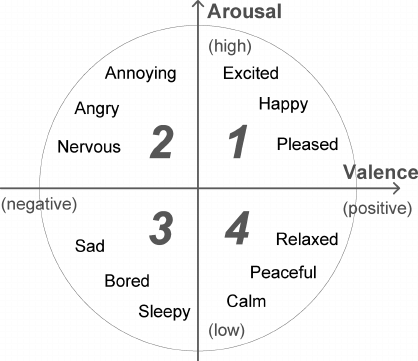

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

ruta = '/content/drive/Shared drives/Sx3/'
fileName = 's15.mat'
db = sio.loadmat(ruta+fileName)
db

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Aug 21 08:32:28 2013',
 '__version__': '1.0',
 'data': array([[[-4.17881751e+00, -1.13304735e-01, -7.67947166e+00, ...,
          -7.44169079e-01, -2.11979605e+00,  1.68879500e+00],
         [ 4.95393351e+00,  2.74700385e+00, -4.05817500e+00, ...,
           7.62460334e-02,  6.84584676e-01,  4.53211096e+00],
         [-1.00720621e+01,  1.53730641e+00,  1.06900747e+00, ...,
           7.92967705e+00,  3.47528178e+00,  2.03442597e-01],
         ...,
         [ 4.72890288e+03,  4.70509043e+03,  4.64321554e+03, ...,
          -1.19698163e+04, -1.20322536e+04, -1.21092848e+04],
         [-9.26052387e+03, -9.45534513e+03, -9.65553739e+03, ...,
          -2.03975616e+04, -2.02920945e+04, -2.02388726e+04],
         [ 2.14919121e-02,  2.14919121e-02,  2.14919121e-02, ...,
           2.44918736e-02,  2.34918864e-02,  2.34918864e-02]],
 
        [[ 2.38163910e+01, -8.09708606e-01, -1.21807861e+01, ...,
  

In [ ]:
X = db['data']
X.shape

(40, 40, 6528)

##Gráfica de una señal emocional
Por ejemplo si queremos obtener la señal de respiration belt (respiración) de la base de datos para el video número 15 (i.e., por elegir alguno), debe acceder a los datos mediante:

(6528,)


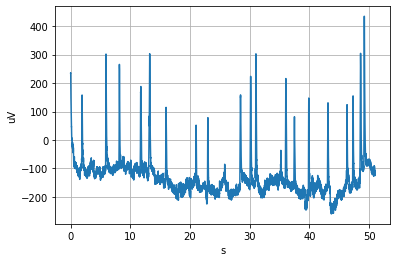

In [ ]:
trial = 15 # video u observación 
channel = 34 # canal de la señal fisiológica
respiration = X[trial-1,channel-1,:]
print(respiration.shape)
ts = len(respiration)/128.
time = np.linspace(0,ts,len(respiration))

plt.plot(time,respiration)
plt.ylabel('uV')
plt.xlabel('s')
plt.grid()
plt.show()

**Señales GSR:**La respuesta galvánica de la piel (GSR), también denominada actividad electrodérmica (EDA) y conductancia de la piel (SC), es la medida de las continuas variaciones en las características eléctricas de la piel, por ejemplo la conductancia, causada por la variación de la sudoración del cuerpo humano. De esta forma, la conductancia de la piel puede ser una medida de las respuestas del Sistema Nervioso Simpático humano. Tal sistema está directamente involucrado en la regulación del comportamiento emocional en los humanos. La señal GSR es muy fácil de registrar: en general sólo son necesarios dos electrodos colocados en el segundo y tercer dedo de una mano. La variación de una corriente aplicada de bajo voltaje entre los dos electrodos se utiliza como medida de la actividad electrodérmica (EDA).




**Vídeos 5 y 15**
Los resultados para estas grabaciones son contrario a los que posterioemente se expondrán. En cierta parte sus indices de GSR denotaban cierta ansiedad que porteriormente fue convirtiendose en tranquilidad por parte de la persona. Esto denota una regulacion y control en su comportamiento emocional.

(6528,)


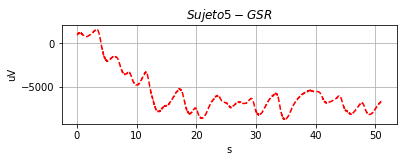

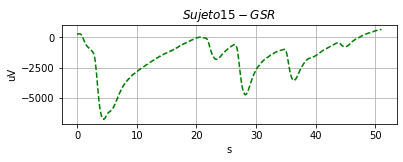

In [ ]:
trial = 5 # video u observación 
trial2 = 15
channel = 37 # canal de la señal fisiológica
GSR = X[trial-1,channel-1,:]
GSR2 = X[trial2-1,channel-1,:]

print(GSR.shape)
ts = len(respiration)/128.
time = np.linspace(0,ts,len(respiration))

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, GSR,'r--' )
plt.grid()
plt.title('$Sujeto 5 - GSR$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,2)
plt.plot(time, GSR2,'g--')
plt.grid()
plt.title('$Sujeto 15 - GSR$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

**Vídeos 10 y 20**
Por otra parte, los siguientes resultados denotan que las personas en su momento de grabación, tenian un comportamiento emocional alterado debido a los altos indices de voltaje [uV] resultantes. Posiblemente ansiosos por la prueba o situaciones personales.

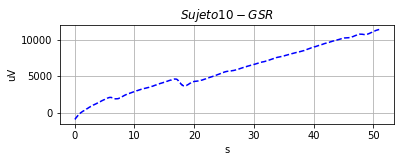

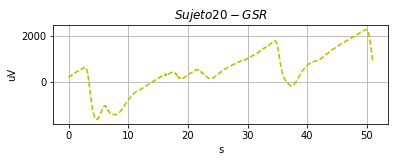

In [ ]:
trial3 = 10
trial4 = 20
GSR3 = X[trial3-1,channel-1,:]
GSR4 = X[trial4-1,channel-1,:]

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, GSR3,'b--' )
plt.grid()
plt.title('$Sujeto 10 - GSR$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,1)
plt.plot(time, GSR4,'y--' )
plt.grid()
plt.title('$Sujeto 20 - GSR$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

In [ ]:
labels = db['labels']
print(labels)

[[8.9  5.86 7.26 8.04]
 [5.04 4.06 5.03 6.09]
 [8.04 5.   7.06 9.  ]
 [8.04 3.96 6.04 8.04]
 [9.   7.15 9.   9.  ]
 [9.   5.13 8.01 8.95]
 [5.04 3.06 5.95 5.01]
 [9.   5.04 9.   7.05]
 [9.   5.06 6.99 8.03]
 [4.99 5.04 7.06 5.95]
 [8.99 5.01 7.26 9.  ]
 [7.08 2.99 6.06 6.13]
 [7.06 4.04 6.   8.05]
 [8.15 3.95 7.03 9.  ]
 [8.12 4.03 9.   7.05]
 [4.17 2.95 4.03 6.06]
 [8.1  2.96 7.04 8.12]
 [7.04 4.05 6.96 7.05]
 [7.04 3.01 6.08 7.  ]
 [7.97 5.06 7.06 9.  ]
 [3.09 3.14 3.13 4.1 ]
 [4.12 2.04 4.06 3.96]
 [3.05 4.12 2.88 4.03]
 [1.92 6.05 2.92 8.01]
 [2.96 5.04 2.95 8.  ]
 [4.96 3.04 2.95 6.  ]
 [6.   4.14 5.17 8.06]
 [4.01 4.97 4.04 7.04]
 [4.05 6.08 4.01 8.  ]
 [2.04 6.99 4.03 6.95]
 [2.99 4.01 3.03 2.95]
 [3.97 6.05 3.1  1.  ]
 [3.01 4.01 4.13 1.  ]
 [3.01 7.13 2.97 1.  ]
 [5.05 6.91 5.03 2.1 ]
 [3.96 5.   4.08 2.03]
 [3.04 5.04 1.9  1.  ]
 [2.08 7.03 1.03 1.  ]
 [4.   5.03 2.01 1.  ]
 [4.01 7.12 1.04 2.12]]


**Análisis de los labels/etiquetas**

Las siguientes ilustraciones corresponden a un gráfico del espacio emocional el cual relaciona emociones humanas para el total de grabaciones.

*Valence vs Arousal*:
Ciertamente la ilustración refleja que los participantes se sentian a gusto con la prueba. Es decir, los indices de Valence reflejan cierta concentración general de positivismo y los indices de Arousal concuerdan con ello, dando una fuerza a esa emocion ya que tambien se concentran en la zona de positivimos aunque no con tanta "fuerza".

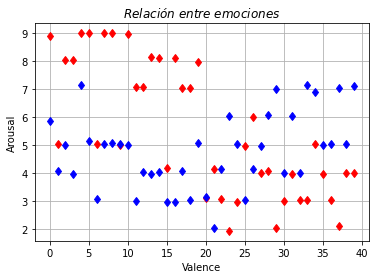

In [ ]:
Valence = labels[:,0]
Arousal = labels[:,1]

plt.plot(Valence,'dr' ,Arousal,'db')
plt.grid()
plt.title('$Relación$ $entre$ $emociones$')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

*Dominance vs Liking*: Por otra parte, la siguiente ilustración del espacio emocional, da razón acerca de que tan a gusto (liking) se encuentra el participante versus que tanto dominio (dominance) o tendencia a controlar la situación tiene la persona. Podemos notar que la mayoría de los indices se alojan en la parte superior izquierda, ciertamente dispersos entre ellos. Sin embargo, son bajos los indices de dominance y altos de estar a gusto, lo cual puede reflejar que estaban dispuestos a tomar la prueba y a seguir instrucciones para llevarla a cabo. Por otra parte, los indices alojados en la parte inferior derecha pueden denotar cierta insatisfaccioón al momento de la grabación por algunos participantes, así como tambien cierta contravía en seguir instrucciones (realmente despreciable).

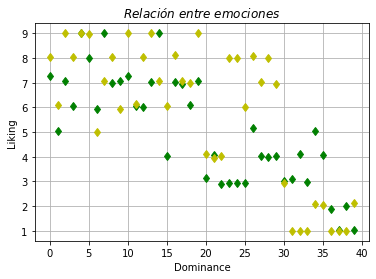

In [ ]:
Dominance = labels[:,2]
Liking = labels[:,3]

plt.plot(Dominance,'dg' ,Liking,'dy')
plt.grid()
plt.title('$Relación$ $entre$ $emociones$')
plt.xlabel('Dominance')
plt.ylabel('Liking')
plt.show()

In [ ]:
#NOTA: Antes de correr está línea, correr primero la lía siguiente.

#Media de la señal GSR
import pandas as pd

mediaGSR=np.mean(GSR, axis=0)
print("media de la señal GSR [Respuesta Galvánica de la piel]: ",mediaGSR)

DF['MeanGSR']= mediaGSR  #Adiciona columna media de GSR
DF

media de la señal GSR [Respuesta Galvánica de la piel]:  -5690.707873511163


,DerivadaGSR,MeanDerivGSR,MeanGSR
0,0.000000,-1.177944,-5690.707874
1,0.000000,-1.177944,-5690.707874
2,-0.444024,-1.177944,-5690.707874
3,-8.756511,-1.177944,-5690.707874
4,-8.312487,-1.177944,-5690.707874
...,...,...,...
6523,-1.802572,-1.177944,-5690.707874
6524,-1.686268,-1.177944,-5690.707874
6525,0.000000,-1.177944,-5690.707874
6526,1.279213,-1.177944,-5690.707874


media de la señal GSR [Respuesta Galvánica de la piel]:  [ 0.          0.         -0.44402365 ...  0.          1.27921345
  2.5584269 ]
Proporción de negativos en la derivada respecto a la cantidad de muestras: 33.14950980392157 %


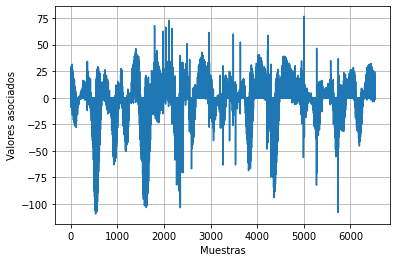

In [ ]:
#Derivada de la señal GSR
DerivGSR= np.gradient(GSR)
print("media de la señal GSR [Respuesta Galvánica de la piel]: ",DerivGSR)
plt.plot(DerivGSR)
plt.xlabel('Muestras')
plt.ylabel('Valores asociados')
plt.grid()

negativos=0

for i in DerivGSR:
  if i<0:
    negativos=negativos + 1

Propor=negativos/len(DerivGSR)
print("Proporción de negativos en la derivada respecto a la cantidad de muestras:",Propor*100,"%")

DF=pd.DataFrame({'DerivadaGSR':DerivGSR})  # crea el dataframe con la primera columna
  

In [ ]:
#Media de la derivada de la señal GSR

mediaDGSR=np.mean(DerivGSR, axis=0)
print("Media de la derivada de la señal GSR [Respuesta Galvánica de la piel]: ",mediaDGSR)

DF['MeanDerivGSR']= mediaDGSR  #Adiciona columna media de la derivada de GSR

Media de la derivada de la señal GSR [Respuesta Galvánica de la piel]:  -1.1779443497751292


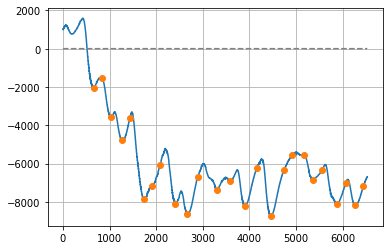

El numero de mínimos locales de la señal GSR ES: 25


In [ ]:
#Minimos locales señal GSR

import scipy.signal as sc
from scipy.signal import find_peaks

peaks, _ = find_peaks(GSR*-1, height=0, distance=170)
plt.plot(GSR)
plt.plot(peaks,GSR[peaks], "o")
plt.plot(np.zeros_like(GSR), "--", color="gray")
plt.grid()
plt.show()
print("El numero de mínimos locales de la señal GSR ES:",len(peaks))

**PATTERN RESPIRATION:**El patrón de respiración se hace por medio de una Respiration belt, que es una banda que mide la frecuencia respiratoria de la persona. En este experimento se usa para saber como se comporta la frecuencia cardiaca de la persona a medida que observa un vídeo.

*Sujetos 20 y 15*: Para ambos casos, los sujetos inicialmente tenian una frecuencia respiratoria alta. Puede deberse a las expectativas o inseguridades respecto la prueba en un inicio. Sin embargo, para los dos casos los sujetos logran controlar su respiración denotando cierta tranquilidad y frecuencia respiratoria baja. 

(6528,)


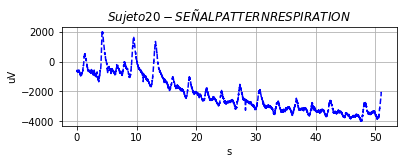

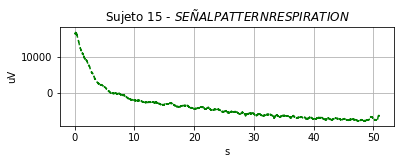

In [ ]:
trial_PR = 20 # video u observación 
trial_PR2 = 15
channel = 38 # canal de la señal fisiológica
PR = X[trial_PR-1,channel-1,:]
PR2 = X[trial_PR2-1,channel-1,:]
print(PR.shape)
ts = len(respiration)/128.
time = np.linspace(0,ts,len(respiration))

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, PR,'b--' )
plt.grid()
plt.title('$Sujeto 20 - SEÑAL PATTERN RESPIRATION$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,2)
plt.plot(time, PR2,'g--')
plt.grid()
plt.title('Sujeto 15 - $SEÑAL PATTERN RESPIRATION$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

*Sujetos 10 y 5*: Por el contrario, desde un inicio para los siguientes casos, los indices reflejan mucha tranquilidad para ambos participantes. Su frecuencia cardiaca no se ve alterada ni en el principio de la grabación ni a final de la misma, contrario a las anteriores grabaciones descritas.

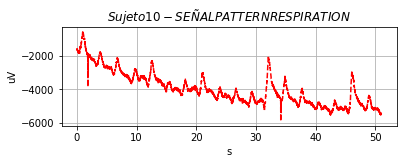

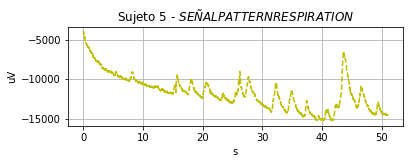

In [ ]:
trial_PR10 = 10 # video u observación 
trial_PR15 = 5
channel = 38 # canal de la señal fisiológica
PR10 = X[trial_PR10-1,channel-1,:]
PR15 = X[trial_PR15-1,channel-1,:]

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, PR10,'r--' )
plt.grid()
plt.title('$Sujeto 10 - SEÑAL PATTERN RESPIRATION$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,2)
plt.plot(time, PR15,'y--')
plt.grid()
plt.title('Sujeto 5 - $SEÑAL PATTERN RESPIRATION$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

In [ ]:
#Media de la señal PATTERN RESPIRATION

mediaPR=np.mean(PR, axis=0)
print("media de la señal PATTERN RESPIRATION: ",mediaPR)

DF['MeanPR']= mediaPR  #Adiciona columna media de patrón de respiración

media de la señal PATTERN RESPIRATION:  -2133.215492907868


la derivada de la señal PATTERN RESPIRATION:  [-24.24995519 -24.90620398  -3.60936833 ...  41.64054806  33.84368747
 -31.46869185]


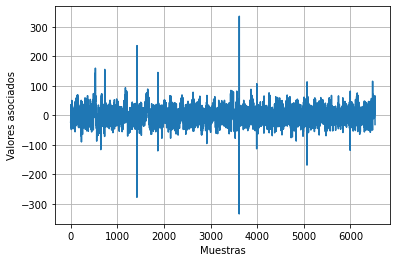

In [ ]:
#Derivada de la señal PATTERN RESPIRATION
DerivPR= np.gradient(PR)
print("la derivada de la señal PATTERN RESPIRATION: ",DerivPR)
plt.plot(DerivPR)
plt.xlabel('Muestras')
plt.ylabel('Valores asociados')
plt.grid()

DF['DerivadaPatternRespiration']= DerivPR  #Adiciona columna de derivadas de respiración


In [ ]:
#Media de la derivada de la señal PATTERN RESPIRATION

mediaDPR=np.mean(DerivPR, axis=0)
print("media de la derivada de la señal PATTERN RESPIRATION: ",mediaDPR)

DF['MeanDerivDPR']= mediaDPR  #Adiciona columna de derivadas de respiración


media de la derivada de la señal PATTERN RESPIRATION:  -0.23182545629582613


In [ ]:
#Desviación estandar de la señal PATTERN RESPIRATION
import statistics

desPR=statistics.stdev(PR)
print("Desviación estandar de la señal PATTERN RESPIRATION: ",desPR)

DF['DesvPR']= desPR  #Adiciona columna desviación estandar del patron de respiracion
DF

Desviación estandar de la señal PATTERN RESPIRATION:  1271.5842631214387


,DerivadaGSR,MeanDerivGSR,MeanGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR
0,0.000000,-1.177944,-5690.707874,-2133.215493,-24.249955,-0.231825,1271.584263
1,0.000000,-1.177944,-5690.707874,-2133.215493,-24.906204,-0.231825,1271.584263
2,-0.444024,-1.177944,-5690.707874,-2133.215493,-3.609368,-0.231825,1271.584263
3,-8.756511,-1.177944,-5690.707874,-2133.215493,13.156226,-0.231825,1271.584263
4,-8.312487,-1.177944,-5690.707874,-2133.215493,6.296863,-0.231825,1271.584263
...,...,...,...,...,...,...,...
6523,-1.802572,-1.177944,-5690.707874,-2133.215493,66.156128,-0.231825,1271.584263
6524,-1.686268,-1.177944,-5690.707874,-2133.215493,22.374959,-0.231825,1271.584263
6525,0.000000,-1.177944,-5690.707874,-2133.215493,41.640548,-0.231825,1271.584263
6526,1.279213,-1.177944,-5690.707874,-2133.215493,33.843687,-0.231825,1271.584263


**Señales EMG:**Es la captación de las señales eléctricas producidas por los músculos durante una contracción muscular se conoce como electromiografía. Estas señales son generadas por el intercambio de iones a través de las membranas de las fibras musculares debido a una contracción muscular.La electromiografía (EMG) consiste básicamente en la adquisición, registro y análisis de la actividad eléctrica generada en nervios y músculos a través de la utilización de electrodos (superficiales, de aguja, implantados). Las mediciones extraídas de EMG proporcionan una información valiosa acerca de la fisiología y los patrones de activación muscular.

*Sujetos 20 y 15*: En cuanto al caso del sujeto 20 se observa una baja actividad muscular en los primeros momentos, luego una estabilización y una subida después del segundo 30. Por su lado, para el sujeto 15 a medida que transcurre el tiempo sus musculos se relajan y van disminuyendo actividad.


(6528,)


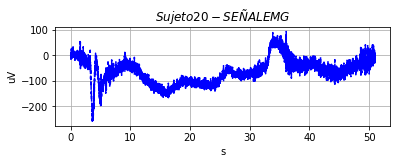

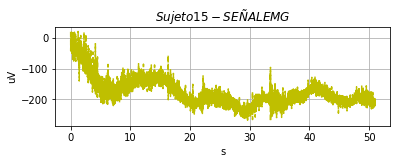

In [ ]:
trialEMG20 = 20 # video u observación 
trialEMG15 = 15 # video u observación 
channel = 35 # canal de la señal fisiológica
EMG20 = X[trialEMG20-1,channel-1,:]
EMG15 = X[trialEMG15-1,channel-1,:]
print(EMG20.shape)
ts = len(respiration)/128.
time = np.linspace(0,ts,len(respiration))

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, EMG20,'b--' )
plt.grid()
plt.title('$Sujeto 20 - SEÑAL EMG$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,2)
plt.plot(time, EMG15,'y--')
plt.grid()
plt.title('$Sujeto 15 - SEÑAL EMG$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

**Vídeos 10 y 5**: Para estos casos ciertamente hay una actividad muscular frecuente e importante. Es mucho mas estable en el sujeto 5, sin embargo, tiene notorios cambios que pueden interpretarse como contracciones para ambos casos. Esto indica comportamientos de actividad muscular para ambos casos durante la prueba.

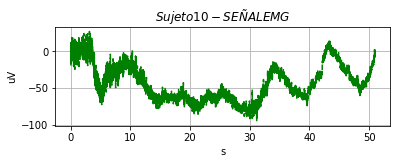

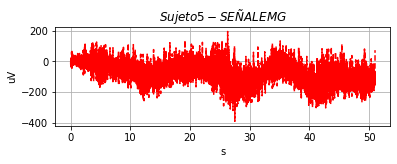

In [ ]:
trialEMG10 = 10 # video u observación 
trialEMG5 = 5 # video u observación 
EMG10 = X[trialEMG10-1,channel-1,:]
EMG5 = X[trialEMG5-1,channel-1,:]

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, EMG10,'g--' )
plt.grid()
plt.title('$Sujeto 10 - SEÑAL EMG$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,2)
plt.plot(time, EMG5,'r--')
plt.grid()
plt.title('$Sujeto 5 - SEÑAL EMG$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

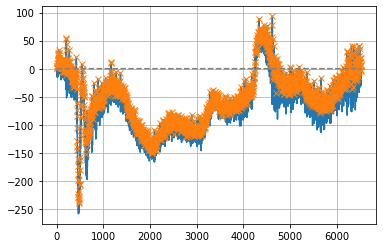

Frecuancia aproximada: 41.549019607843135 Hz


In [ ]:
#Frecuencia de parpadeo de los ojos
import scipy.signal as sc
from scipy.signal import find_peaks
import cv2

peaks, _ = find_peaks(EMG20, height=-260)
plt.plot(EMG20)
plt.plot(peaks,EMG20[peaks], "x")
plt.plot(np.zeros_like(EMG20), "--", color="gray")
plt.grid()
plt.show()

freq=len(EMG20[peaks])
print("Frecuancia aproximada:", freq/51, "Hz")

DF['FreqParp']= freq/51  #Adiciona columna media de frecuencia de parpadeo

In [ ]:
#Energía de la señal

EMG2=EMG20**2
print("La energía de la señal es:", sum(EMG2))

DF['EnergiaEMG']= sum(EMG2) #Adiciona columna energia de EMG
DF

La energía de la señal es: 42702166.71071684


,DerivadaGSR,MeanDerivGSR,MeanGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR,FreqParp,EnergiaEMG
0,0.000000,-1.177944,-5690.707874,-2133.215493,-24.249955,-0.231825,1271.584263,41.54902,4.270217e+07
1,0.000000,-1.177944,-5690.707874,-2133.215493,-24.906204,-0.231825,1271.584263,41.54902,4.270217e+07
2,-0.444024,-1.177944,-5690.707874,-2133.215493,-3.609368,-0.231825,1271.584263,41.54902,4.270217e+07
3,-8.756511,-1.177944,-5690.707874,-2133.215493,13.156226,-0.231825,1271.584263,41.54902,4.270217e+07
4,-8.312487,-1.177944,-5690.707874,-2133.215493,6.296863,-0.231825,1271.584263,41.54902,4.270217e+07
...,...,...,...,...,...,...,...,...,...
6523,-1.802572,-1.177944,-5690.707874,-2133.215493,66.156128,-0.231825,1271.584263,41.54902,4.270217e+07
6524,-1.686268,-1.177944,-5690.707874,-2133.215493,22.374959,-0.231825,1271.584263,41.54902,4.270217e+07
6525,0.000000,-1.177944,-5690.707874,-2133.215493,41.640548,-0.231825,1271.584263,41.54902,4.270217e+07
6526,1.279213,-1.177944,-5690.707874,-2133.215493,33.843687,-0.231825,1271.584263,41.54902,4.270217e+07


media de la señal PATTERN RESPIRATION:  [-62.03113538 -17.34371795  13.51560003 ...  -3.31249388  -2.73436995
  -7.28123655]
6528


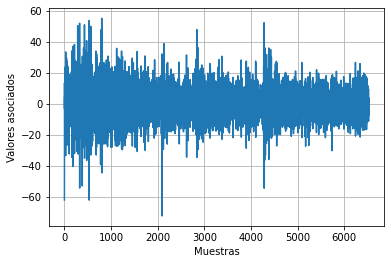

In [ ]:
#Derivada de la señal EMG15 para frecuencia (PRUEBA)
DerivEMG= np.gradient(EMG15)
print("media de la señal PATTERN RESPIRATION: ",DerivEMG)
plt.plot(DerivEMG)
plt.xlabel('Muestras')
plt.ylabel('Valores asociados')
plt.grid()

print(len(DerivEMG))

DF['DerivEMG']= DerivEMG  #Adiciona columna derivada de la señal EMG

media de la señal PATTERN RESPIRATION:  [-2.56249527  4.99999076 -6.15623862 ... -2.37499561 20.31246247
  9.37498268]
6528


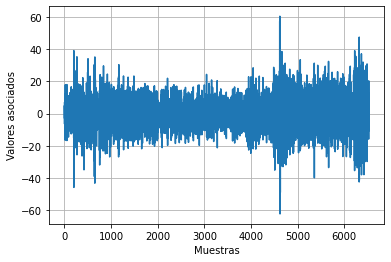

In [ ]:
#Derivada de la señal EMG20 para frecuencia (PRUEBA)
DerivEMG= np.gradient(EMG20)
print("media de la señal PATTERN RESPIRATION: ",DerivEMG)
plt.plot(DerivEMG)
plt.xlabel('Muestras')
plt.ylabel('Valores asociados')
plt.grid()

print(len(DerivEMG))

DF['DerivEMG']= DerivEMG  #Adiciona columna derivada de la señal EMG

In [ ]:
#Media y Varianza de la señal EMG

mediaEMG=np.mean(EMG20, axis=0)
print("media  de la señal EMG: ",mediaEMG)

DF['MeanEMG']= mediaEMG  #Adiciona columna media de EMG

varianzaEMG=np.var(EMG20)
print("varianza de la señal EMG: ",varianzaEMG)

DF['VarEMG']= varianzaEMG #Adiciona columna varianza EMG
DF


media  de la señal EMG:  -65.24284724030987
varianza de la señal EMG:  2284.756715888894


,DerivadaGSR,MeanDerivGSR,MeanGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR,FreqParp,EnergiaEMG,MeanEMG,VarEMG
0,0.000000,-1.177944,-5690.707874,-2133.215493,-24.249955,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716
1,0.000000,-1.177944,-5690.707874,-2133.215493,-24.906204,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716
2,-0.444024,-1.177944,-5690.707874,-2133.215493,-3.609368,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716
3,-8.756511,-1.177944,-5690.707874,-2133.215493,13.156226,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716
4,-8.312487,-1.177944,-5690.707874,-2133.215493,6.296863,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716
...,...,...,...,...,...,...,...,...,...,...,...
6523,-1.802572,-1.177944,-5690.707874,-2133.215493,66.156128,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716
6524,-1.686268,-1.177944,-5690.707874,-2133.215493,22.374959,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716
6525,0.000000,-1.177944,-5690.707874,-2133.215493,41.640548,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716
6526,1.279213,-1.177944,-5690.707874,-2133.215493,33.843687,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716


**SEÑALES EOG:**El electrooculograma es un instrumento de diagnóstico que se utiliza en oftalmología para estudiar el movimiento de los músculos del ojo. Este examen registra la diferencia de potencia que existe entre la córnea y la retina, además de medir las variaciones eléctricas que se producen en el ojo al realizar un movimiento sacádico. El electrooculograma consiste en colocar pequeños electrodos en zonas cercanas a los músculos de los ojos con el objetivo de medir sus movimientos, el electrooculograma toma como valor de referencia la diferencia de potencia entre la retina y la córnea. Por lo general, existe una diferencia de 0,4 a 5 mV entre la potencia de la córnea y la membrana de Bruch, que se halla en el segmento posterior del ojo. Ésta se origina en el epitelio pigmentario de la retina y permite hallar un dipolo, donde la córnea se considera el lado positivo y la retina el lado negativo. El potencial producido por el dipolo es susceptible a los sistemas de registro unipolares y bipolares, y puede ser identificado mediante la colocación de los electrodos en la piel cercana a los ojos.

**Representación gráfica de la toma de prueba**

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Image ('EOG.png', width=1000)

Para esta toma de la señal fisiologica, se observa un considerable movimiento de los ojos de forma horizontal para los dos sujetos en las grabaciones. Ciertamente un movimiento más notorio dle sujeto 20 en comparacion con el sujeto 15. Este metodo es muy util pues no requiere el uso de camaras para determinar el movimiento de los ojos. Basta con uso de electrodos generalmente adjuntos entre ellos, tal como se ve en la ilustración anterior. 

(6528,)


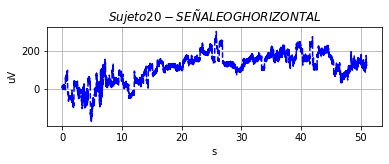

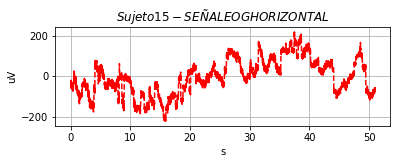

In [ ]:
#Señal EOG HORIZONTAL
trialEOGH20 = 20 # video u observación 
trialEOGH15 = 15 # video u observación 
channel = 33 # canal de la señal fisiológica
EOGH20 = X[trialEOGH20-1,channel-1,:]
EOGH15 = X[trialEOGH15-1,channel-1,:]

print(EOGH20.shape)
ts = len(respiration)/128.
time = np.linspace(0,ts,len(respiration))

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, EOGH20,'b--' )
plt.grid()
plt.title('$Sujeto 20 - SEÑAL EOG HORIZONTAL$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,2)
plt.plot(time, EOGH15,'r--')
plt.grid()
plt.title('$Sujeto 15 - SEÑAL EOG HORIZONTAL$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

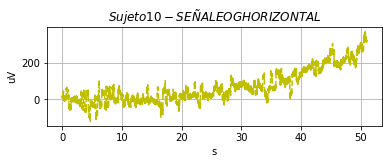

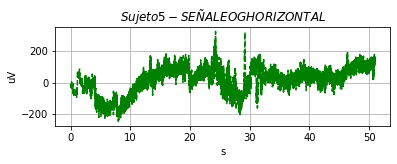

In [ ]:
trialEOGH10 = 10 # video u observación 
trialEOGH5 = 5 # video u observación 

EOGH10 = X[trialEOGH10-1,channel-1,:]
EOGH5 = X[trialEOGH5-1,channel-1,:]

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, EOGH10,'y--' )
plt.grid()
plt.title('$Sujeto 10 - SEÑAL EOG HORIZONTAL$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,2)
plt.plot(time, EOGH5,'g--')
plt.grid()
plt.title('$Sujeto 5 - SEÑAL EOG HORIZONTAL$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

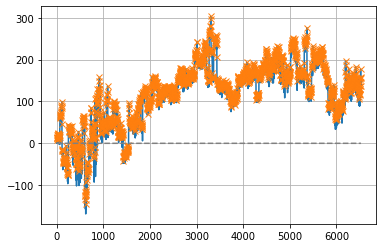

Frecuancia aproximada: 41.549019607843135 Hz


In [ ]:
#Frecuencia de parpadeo de los ojos

peaks, _ = find_peaks(EOGH20, height=-260)
plt.plot(EOGH20)
plt.plot(peaks,EOGH20[peaks], "x")
plt.plot(np.zeros_like(EOGH20), "--", color="gray")
plt.grid()
plt.show()

print("Frecuancia aproximada:", freq/51, "Hz")

DF['FreqParpEOGH']= freq/51  #Adiciona columna frecuencia de parpadeo EOGH

In [ ]:
#Energía d ela señal EOG HORIZONTAL
EOGH2=EOGH20**2
print("La energía de la señal es:", sum(EOGH2))

DF['EnergyEOGH']= sum(EOGH2)  #Adiciona columna Energia de la señal EOGH

La energía de la señal es: 121133360.39499424


In [ ]:
#Media y Varianza de la señal EOG HORIZONTAL

mediaEOGH=np.mean(EOGH20, axis=0)
print("media  de la señal EOG HORIZONTAL: ",mediaEOGH)

DF['MeanEOGH']= mediaEOGH  #Adiciona columna media del EOGH

varianzaEOGH=np.var(EOGH20)
print("varianza de la señal  EOG HORIZONTAL: ",varianzaEOGH)

DF['VarEOGH']= varianzaEOGH  #Adiciona columna varianza de EOGH

DF

media  de la señal EOG HORIZONTAL:  113.02630674278272
varianza de la señal  EOG HORIZONTAL:  5781.0221818489945


,DerivadaGSR,MeanDerivGSR,MeanGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR,FreqParp,EnergiaEMG,MeanEMG,VarEMG,DerivEMG,FreqParpEOGH,EnergyEOGH,MeanEOGH,VarEOGH
0,0.000000,-1.177944,-5690.707874,-2133.215493,-24.249955,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-2.562495,41.54902,1.211334e+08,113.026307,5781.022182
1,0.000000,-1.177944,-5690.707874,-2133.215493,-24.906204,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,4.999991,41.54902,1.211334e+08,113.026307,5781.022182
2,-0.444024,-1.177944,-5690.707874,-2133.215493,-3.609368,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-6.156239,41.54902,1.211334e+08,113.026307,5781.022182
3,-8.756511,-1.177944,-5690.707874,-2133.215493,13.156226,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-6.406238,41.54902,1.211334e+08,113.026307,5781.022182
4,-8.312487,-1.177944,-5690.707874,-2133.215493,6.296863,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,7.109362,41.54902,1.211334e+08,113.026307,5781.022182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,-1.802572,-1.177944,-5690.707874,-2133.215493,66.156128,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,11.124979,41.54902,1.211334e+08,113.026307,5781.022182
6524,-1.686268,-1.177944,-5690.707874,-2133.215493,22.374959,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-15.796846,41.54902,1.211334e+08,113.026307,5781.022182
6525,0.000000,-1.177944,-5690.707874,-2133.215493,41.640548,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-2.374996,41.54902,1.211334e+08,113.026307,5781.022182
6526,1.279213,-1.177944,-5690.707874,-2133.215493,33.843687,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,20.312462,41.54902,1.211334e+08,113.026307,5781.022182


**EGO**
El componente EOG vertical tiene menos estabilidad que el EOG horizontal, lo que dificulta la estimación precisa de la ubicación vertical de los ojos. Las grabaciones o pruebas visuales de las señales EOG registradas mostraron que el componente EOG vertical está muy influenciado por los movimientos oculares horizontales, mientras que el EOG horizontal rara vez se ve afectado por los movimientos oculares verticales.

(6528,)


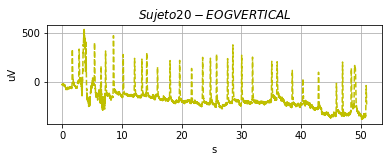

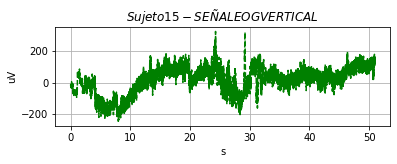

In [ ]:
#Señal EOG VERTICAL
trialEOGV20 = 20 # video u observación 
trialEOGV15 = 15 # video u observación 
channel = 34 # canal de la señal fisiológica
EOGV20 = X[trialEOGV20-1,channel-1,:]
EOGV15 = X[trialEOGV15-1,channel-1,:]

print(EOGV20.shape)
ts = len(respiration)/128.
time = np.linspace(0,ts,len(respiration))

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, EOGV20,'y--' )
plt.grid()
plt.title('$Sujeto 20 - EOG VERTICAL$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,2)
plt.plot(time, EOGH5,'g--')
plt.grid()
plt.title('$Sujeto 15 - SEÑAL EOG VERTICAL$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

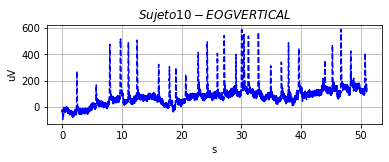

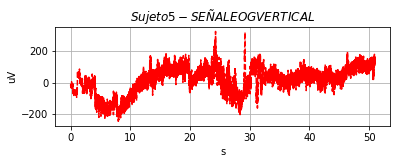

In [ ]:
trialEOGV10 = 20 # video u observación 
trialEOGV5 = 5 # video u observación 
channel = 34 # canal de la señal fisiológica
EOGV10 = X[trialEOGV10-1,channel-1,:]
EOGV5 = X[trialEOGV5-1,channel-1,:]
plt.figure()
plt.subplot(2,1,1)
plt.plot(time, EOGV10,'b--' )
plt.grid()
plt.title('$Sujeto 10 - EOG VERTICAL$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

plt.subplot(2,1,2)
plt.plot(time, EOGH5,'r--')
plt.grid()
plt.title('$Sujeto 5 - SEÑAL EOG VERTICAL$')
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

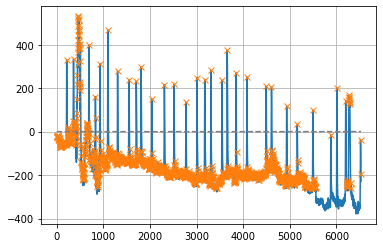

Frecuancia aproximada: 41.549019607843135 Hz


In [ ]:
#Frecuencia de parpadeo de los ojos

peaks, _ = find_peaks(EOGV20, height=-260)
plt.plot(EOGV20)
plt.plot(peaks,EOGV20[peaks], "x")
plt.plot(np.zeros_like(EOGV20), "--", color="gray")
plt.grid()
plt.show()

print("Frecuancia aproximada:", freq/51, "Hz")

DF['FreqEOGV']= freq/51 #Adiciona columna frecuencia de EOGV

In [ ]:
#Energía de la señal EOG VERTICAL
EOGV2=EOGV20**2
print("La energía de la señal es:", sum(EOGV2))

DF['EnergyEOGV']= sum(EOGV2) #Adiciona columna energia de la EOG
DF

La energía de la señal es: 281174971.85977805


,DerivadaGSR,MeanDerivGSR,MeanGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR,FreqParp,EnergiaEMG,MeanEMG,VarEMG,DerivEMG,FreqParpEOGH,EnergyEOGH,MeanEOGH,VarEOGH,FreqEOGV,EnergyEOGV
0,0.000000,-1.177944,-5690.707874,-2133.215493,-24.249955,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-2.562495,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08
1,0.000000,-1.177944,-5690.707874,-2133.215493,-24.906204,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,4.999991,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08
2,-0.444024,-1.177944,-5690.707874,-2133.215493,-3.609368,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-6.156239,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08
3,-8.756511,-1.177944,-5690.707874,-2133.215493,13.156226,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-6.406238,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08
4,-8.312487,-1.177944,-5690.707874,-2133.215493,6.296863,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,7.109362,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,-1.802572,-1.177944,-5690.707874,-2133.215493,66.156128,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,11.124979,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08
6524,-1.686268,-1.177944,-5690.707874,-2133.215493,22.374959,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-15.796846,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08
6525,0.000000,-1.177944,-5690.707874,-2133.215493,41.640548,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-2.374996,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08
6526,1.279213,-1.177944,-5690.707874,-2133.215493,33.843687,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,20.312462,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08


In [ ]:
#Media y Varianza de la señal EOG VERTICAL

mediaEOGV=np.mean(EOGV20, axis=0)
print("media  de la señal EOG VERTICALL: ",mediaEOGV)

DF['MeanEOGV']= mediaEOGV  #Adiciona columna media de EOGV

varianzaEOGV=np.var(EOGV20)
print("varianza de la señal  EOG VERTICAL: ",varianzaEOGV)

DF['VarEOGV']= varianzaEOGV #Adiciona columna varianza de EOGV

DF

media  de la señal EOG VERTICALL:  -166.32227425009128
varianza de la señal  EOG VERTICAL:  15409.047512875743


,DerivadaGSR,MeanDerivGSR,MeanGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR,FreqParp,EnergiaEMG,MeanEMG,VarEMG,DerivEMG,FreqParpEOGH,EnergyEOGH,MeanEOGH,VarEOGH,FreqEOGV,EnergyEOGV,MeanEOGV,VarEOGV
0,0.000000,-1.177944,-5690.707874,-2133.215493,-24.249955,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-2.562495,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513
1,0.000000,-1.177944,-5690.707874,-2133.215493,-24.906204,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,4.999991,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513
2,-0.444024,-1.177944,-5690.707874,-2133.215493,-3.609368,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-6.156239,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513
3,-8.756511,-1.177944,-5690.707874,-2133.215493,13.156226,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-6.406238,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513
4,-8.312487,-1.177944,-5690.707874,-2133.215493,6.296863,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,7.109362,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,-1.802572,-1.177944,-5690.707874,-2133.215493,66.156128,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,11.124979,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513
6524,-1.686268,-1.177944,-5690.707874,-2133.215493,22.374959,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-15.796846,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513
6525,0.000000,-1.177944,-5690.707874,-2133.215493,41.640548,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-2.374996,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513
6526,1.279213,-1.177944,-5690.707874,-2133.215493,33.843687,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,20.312462,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513


**SEÑALES EEG:**La electroencefalografía (EEG) es una exploración neurofisiológica que se basa en el registro de la actividad bioeléctrica cerebral en condiciones basales de reposo, en vigilia o sueño, y durante diversas activaciones.*El* análisis en el dominio de la frecuencia se realiza utilizando el algoritmo de Transformada Rápida de Fourier (FFT) (con una resolución de 0,125 Hz) para calcular la densidad de potencia absoluta (μV2 / Hz), la densidad de potencia relativa (%) y la frecuencia media (Hz) dentro de cada una de las subbandas. La potencia absoluta de una banda es la integral de todos los valores de potencia dentro de su rango de frecuencia. Los índices de potencia relativa (RP) para cada banda se encuentran expresando la potencia absoluta en cada banda de frecuencia como un porcentaje de la potencia absoluta (AP) sumada en las cuatro bandas de frecuencia. Para las medidas de asimetría de potencia inter-hemisférica (absoluta) para cada banda para siete sitios homólogos (AF3-AF4, F7-F8, F3-F4, FC5-FC6, T7-T8, P7-P8, O1-O2) y un conjunto adicional de diez pares de sitios de electrodos (AF3-F3, AF4-F4, F3-O1, F4-O2, FC5-P7, FC6-P8, P7-O1, P8-O2, T7-O1, T8-O2). Los índices de asimetría del hemisferio derecho (R) frente al hemisferio izquierdo (L) (R-L) se calcularon con la fórmula [(R-L) / (R + L)]. Para la simetría intra-hemisférica, las relaciones de valor anterior (A) (frontal) vs. posterior (P) (posterior) (A-P) para cada par de electrodos se derivaron con la fórmula [(A-P) / (A + P)]. Las variables de EEG de potencia absoluta y asimetría se pueden transformar logarítmicamente (log (χ)) y las variables de potencia relativa se pueden transformar mediante log [χ ÷ (1 - χ)] con el fin de normalizar la distribución de los datos [63-65].

In [ ]:
#Electrodos de la señal EEG

trial = 20 # video u observación 
channel = 1 # canal de la señal EEG FP1
FP1 = X[trial-1,channel-1,:]

channel = 17 # canal de la señal EEG FP2
FP2 = X[trial-1,channel-1,:]

channel = 2 # canal de la señal EEG AF3
AF3 = X[trial-1,channel-1,:]

channel = 18 # canal de la señal EEG AF4
AF4 = X[trial-1,channel-1,:]

channel = 3 # canal de la señal EEG F3
F3 = X[trial-1,channel-1,:]

channel = 20 # canal de la señal EEG F4
F4 = X[trial-1,channel-1,:]

channel = 4 # canal de la señal EEG F7
F7 = X[trial-1,channel-1,:]

channel = 21 # canal de la señal EEG F8
F8 = X[trial-1,channel-1,:]

channel = 5 # canal de la señal EEG FC5
FC5 = X[trial-1,channel-1,:]

channel = 22 # canal de la señal EEG FC6
FC6 = X[trial-1,channel-1,:]

channel = 6 # canal de la señal EEG FC1
FC1 = X[trial-1,channel-1,:]

channel = 23 # canal de la señal EEG FC2
FC2 = X[trial-1,channel-1,:]

channel = 7 # canal de la señal EEG C3
C3 = X[trial-1,channel-1,:]

channel = 25 # canal de la señal EEG C4
C4 = X[trial-1,channel-1,:]

channel = 8 # canal de la señal EEG T7
T7 = X[trial-1,channel-1,:]

channel = 26 # canal de la señal EEG T8
T8 = X[trial-1,channel-1,:]

channel = 9 # canal de la señal EEG CP5
CP5 = X[trial-1,channel-1,:]

channel = 27 # canal de la señal EEG CP6
CP6 = X[trial-1,channel-1,:]

channel = 10 # canal de la señal EEG CP1
CP1 = X[trial-1,channel-1,:]

channel = 28 # canal de la señal EEG CP2
CP2 = X[trial-1,channel-1,:]

channel = 11 # canal de la señal EEG P3
P3 = X[trial-1,channel-1,:]

channel = 29 # canal de la señal EEG P4
P4 = X[trial-1,channel-1,:]

channel = 12 # canal de la señal EEG P7
P7 = X[trial-1,channel-1,:]

channel = 30 # canal de la señal EEG P8
P8 = X[trial-1,channel-1,:]

channel = 13 # canal de la señal EEG PO3
PO3 = X[trial-1,channel-1,:]

channel = 31 # canal de la señal EEG PO4
PO4 = X[trial-1,channel-1,:]

channel = 14 # canal de la señal EEG O1
o1 = X[trial-1,channel-1,:]

channel = 32 # canal de la señal EEG O2
o2 = X[trial-1,channel-1,:]

channel = 15 # canal de la señal EEG OZ
OZ = X[trial-1,channel-1,:]

channel = 16 # canal de la señal EEG PZ
PZ = X[trial-1,channel-1,:]

channel = 19 # canal de la señal EEG FZ
FZ = X[trial-1,channel-1,:]

channel = 24 # canal de la señal EEG CZ
CZ = X[trial-1,channel-1,:]

# se resta por convención el hemisferio izq del der

assFP1FP2=FP1-FP2

assAF3AF4=AF3-AF4

assF3F4=F3-F4

assF7F8=F7-F7

assFC5FC6=FC5-FC6

assFC1FC2=FC1-FC2

assC3C4=C3-C4

assT7T8=T7-T8

assCP5CP6=CP5-CP6

assCP1CP2=CP1-CP2

assP3P4=P3-P4

assP7P8=P7-P8

assPO3PO4=PO3-PO4

assO1O2=o1-o2

print(len(assP7P8))

6528


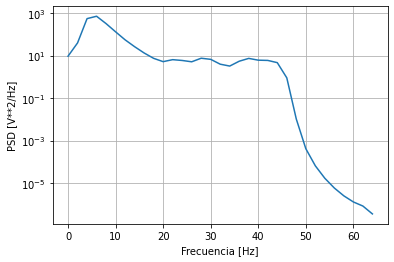

La potencia absoluta asociada es: 1942.5031830824794


In [ ]:
#Densidad espectral de potencia assFP1FP2
from scipy import signal
import matplotlib.pyplot as plt

fs=128
f, Pxx_den1 = signal.welch(assFP1FP2, fs, nperseg=64)
plt.semilogy(f, Pxx_den1)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den1))

DF['PotAssFPIFP2']= np.sum(Pxx_den1)  #Adiciona columna varianza de EOGH

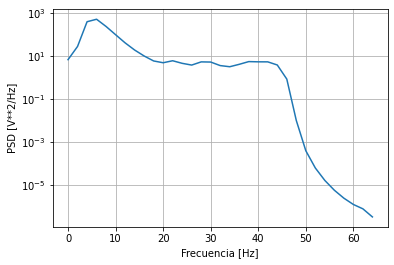

La potencia absoluta asociada es: 1407.6468758828278


In [ ]:
#Densidad espectral de potencia assAF3AF4

fs=128
f, Pxx_den2 = signal.welch(assAF3AF4, fs, nperseg=64)
plt.semilogy(f, Pxx_den2)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den2))

DF['PotAssAF3AF4']= np.sum(Pxx_den2)  #Adiciona columna varianza de EOGH

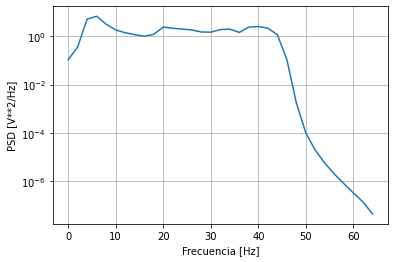

La potencia absoluta asociada es: 46.61623249252495


In [ ]:
#Densidad espectral de potencia assF3F4

fs=128
f, Pxx_den3 = signal.welch(assF3F4, fs, nperseg=64)
plt.semilogy(f, Pxx_den3)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den3))

DF['PotAssF3F4']= np.sum(Pxx_den3)  #Adiciona columna varianza de EOGH

/usr/local/lib/python3.6/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


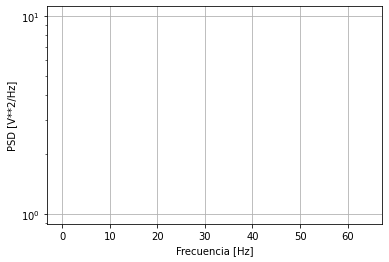

La potencia absoluta asociada es: 0.0


In [ ]:
#Densidad espectral de potencia assF7F8

fs=128
f, Pxx_den4 = signal.welch(assF7F8, fs, nperseg=64)
plt.semilogy(f, Pxx_den4)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den4))

DF['PotAssF7F8']= np.sum(Pxx_den4)  #Adiciona columna varianza de EOGH

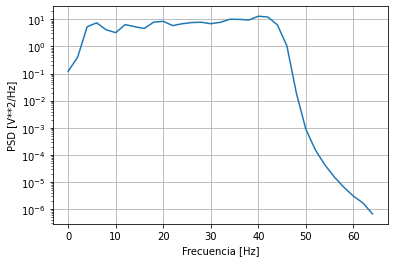

La potencia absoluta asociada es: 157.60509652222805


In [ ]:
#Densidad espectral de potencia assFC5FC6

fs=128
f, Pxx_den5 = signal.welch(assFC5FC6, fs, nperseg=64)
plt.semilogy(f, Pxx_den5)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den5))

DF['PotAssFC5FC6']= np.sum(Pxx_den5)  #Adiciona columna varianza de EOGH

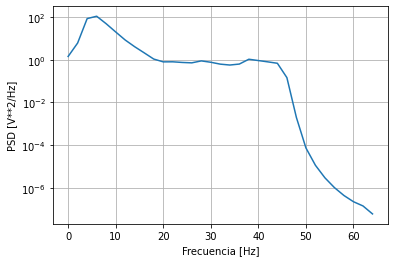

La potencia absoluta asociada es: 296.2343425868203


In [ ]:
#Densidad espectral de potencia assFC1FC2

fs=128
f, Pxx_den6 = signal.welch(assFC1FC2, fs, nperseg=64)
plt.semilogy(f, Pxx_den6)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den6))

DF['PotAssFC1FC2']= np.sum(Pxx_den6)  #Adiciona columna varianza de EOGH

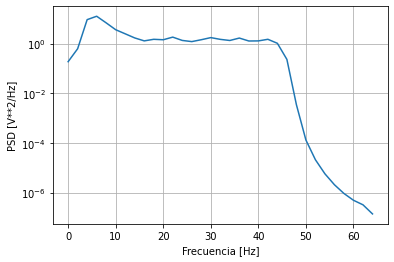

La potencia absoluta asociada es: 59.24161880113368


In [ ]:
#Densidad espectral de potencia assC3C4

fs=128
f, Pxx_den7 = signal.welch(assC3C4, fs, nperseg=64)
plt.semilogy(f, Pxx_den7)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den7))

DF['PotAssC3C4']= np.sum(Pxx_den7)  #Adiciona columna varianza de EOGH

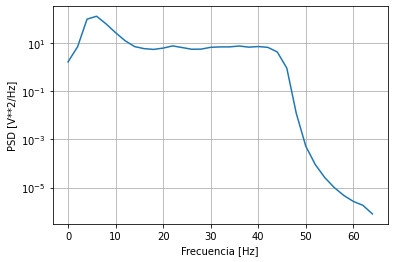

La potencia absoluta asociada es: 439.6926426092213


In [ ]:
#Densidad espectral de potencia assT7T8

fs=128
f, Pxx_den8 = signal.welch(assT7T8, fs, nperseg=64)
plt.semilogy(f, Pxx_den8)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den8))

DF['PotAssT7T8']= np.sum(Pxx_den8)  #Adiciona columna varianza de EOGH

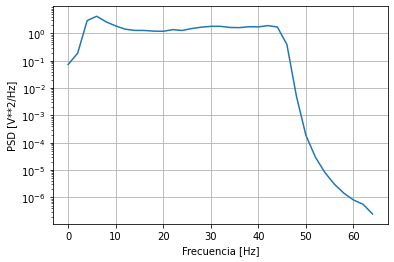

La potencia absoluta asociada es: 38.940191779828275


In [ ]:
#Densidad espectral de potencia assCP5CP6

fs=128
f, Pxx_den9 = signal.welch(assCP5CP6, fs, nperseg=64)
plt.semilogy(f, Pxx_den9)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den9))

DF['PotAssCP5CP6']= np.sum(Pxx_den9)  #Adiciona columna varianza de EOGH

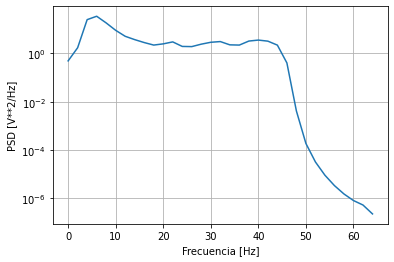

La potencia absoluta asociada es: 138.75345790489757


In [ ]:
#Densidad espectral de potencia assCP1CP2

fs=128
f, Pxx_den10 = signal.welch(assCP1CP2, fs, nperseg=64)
plt.semilogy(f, Pxx_den10)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den10))

DF['PotAssCP1CP2']= np.sum(Pxx_den10)  #Adiciona columna varianza de EOGH

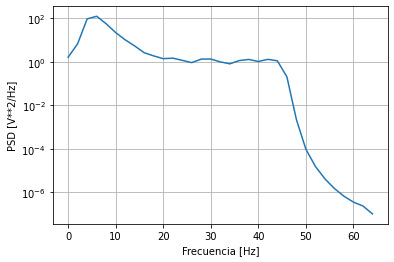

La potencia absoluta asociada es: 342.1778666501289


In [ ]:
#Densidad espectral de potencia assP3P4

fs=128
f, Pxx_den11 = signal.welch(assP3P4, fs, nperseg=64)
plt.semilogy(f, Pxx_den11)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den11))

DF['PotAssP3P4']= np.sum(Pxx_den11)  #Adiciona columna varianza de EOGH

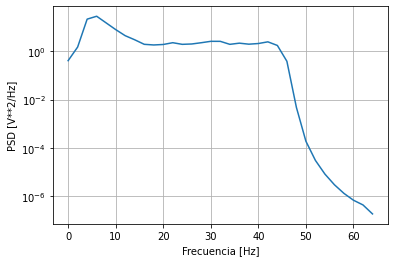

La potencia absoluta asociada es: 116.28222147133313


In [ ]:
#Densidad espectral de potencia assP7P8

fs=128
f, Pxx_den12 = signal.welch(assP7P8, fs, nperseg=64)
plt.semilogy(f, Pxx_den12)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den12))

DF['PotAssP7P8']= np.sum(Pxx_den12)  #Adiciona columna varianza de EOGH

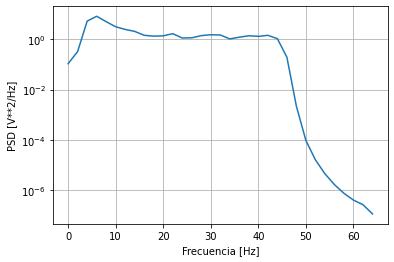

La potencia absoluta asociada es: 47.053716054636915


In [ ]:
#Densidad espectral de potencia assPO3PO4

fs=128
f, Pxx_den13 = signal.welch(assPO3PO4, fs, nperseg=64)
plt.semilogy(f, Pxx_den13)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den13))

DF['PotAssPO3PO4']= np.sum(Pxx_den13)  #Adiciona columna varianza de EOGH

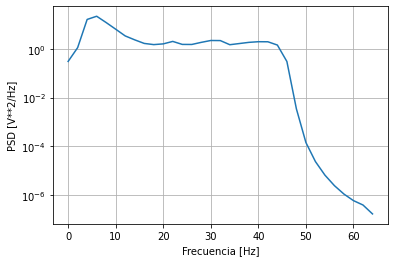

La potencia absoluta asociada es: 90.51448525482432


,DerivadaGSR,MeanDerivGSR,MeanGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR,FreqParp,EnergiaEMG,MeanEMG,VarEMG,DerivEMG,FreqParpEOGH,EnergyEOGH,MeanEOGH,VarEOGH,FreqEOGV,EnergyEOGV,MeanEOGV,VarEOGV,PotAssFPIFP2,PotAssAF3AF4,PotAssF3F4,PotAssF7F8,PotAssFC5FC6,PotAssFC1FC2,PotAssC3C4,PotAssT7T8,PotAssCP5CP6,PotAssCP1CP2,PotAssP3P4,PotAssP7P8,PotAssPO3PO4,PotAssO1O2
0,0.000000,-1.177944,-5690.707874,-2133.215493,-24.249955,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-2.562495,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513,1942.503183,1407.646876,46.616232,0.0,157.605097,296.234343,59.241619,439.692643,38.940192,138.753458,342.177867,116.282221,47.053716,90.514485
1,0.000000,-1.177944,-5690.707874,-2133.215493,-24.906204,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,4.999991,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513,1942.503183,1407.646876,46.616232,0.0,157.605097,296.234343,59.241619,439.692643,38.940192,138.753458,342.177867,116.282221,47.053716,90.514485
2,-0.444024,-1.177944,-5690.707874,-2133.215493,-3.609368,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-6.156239,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513,1942.503183,1407.646876,46.616232,0.0,157.605097,296.234343,59.241619,439.692643,38.940192,138.753458,342.177867,116.282221,47.053716,90.514485
3,-8.756511,-1.177944,-5690.707874,-2133.215493,13.156226,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-6.406238,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513,1942.503183,1407.646876,46.616232,0.0,157.605097,296.234343,59.241619,439.692643,38.940192,138.753458,342.177867,116.282221,47.053716,90.514485
4,-8.312487,-1.177944,-5690.707874,-2133.215493,6.296863,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,7.109362,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513,1942.503183,1407.646876,46.616232,0.0,157.605097,296.234343,59.241619,439.692643,38.940192,138.753458,342.177867,116.282221,47.053716,90.514485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,-1.802572,-1.177944,-5690.707874,-2133.215493,66.156128,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,11.124979,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513,1942.503183,1407.646876,46.616232,0.0,157.605097,296.234343,59.241619,439.692643,38.940192,138.753458,342.177867,116.282221,47.053716,90.514485
6524,-1.686268,-1.177944,-5690.707874,-2133.215493,22.374959,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-15.796846,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513,1942.503183,1407.646876,46.616232,0.0,157.605097,296.234343,59.241619,439.692643,38.940192,138.753458,342.177867,116.282221,47.053716,90.514485
6525,0.000000,-1.177944,-5690.707874,-2133.215493,41.640548,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,-2.374996,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513,1942.503183,1407.646876,46.616232,0.0,157.605097,296.234343,59.241619,439.692643,38.940192,138.753458,342.177867,116.282221,47.053716,90.514485
6526,1.279213,-1.177944,-5690.707874,-2133.215493,33.843687,-0.231825,1271.584263,41.54902,4.270217e+07,-65.242847,2284.756716,20.312462,41.54902,1.211334e+08,113.026307,5781.022182,41.54902,2.811750e+08,-166.322274,15409.047513,1942.503183,1407.646876,46.616232,0.0,157.605097,296.234343,59.241619,439.692643,38.940192,138.753458,342.177867,116.282221,47.053716,90.514485


In [ ]:
#Densidad espectral de potencia assO1O2

fs=128
f, Pxx_den14 = signal.welch(assO1O2, fs, nperseg=64)
plt.semilogy(f, Pxx_den14)
#plt.ylim([0.5e-3, 1])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

print("La potencia absoluta asociada es:", np.sum(Pxx_den14))

DF['PotAssO1O2']= np.sum(Pxx_den14)  #Adiciona columna varianza de EOGH

DF

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
from sklearn.decomposition import PCA

# para indexar un dataframe en pandas utilizamos iloc y la convención normal
X =  DF.drop(['DerivadaGSR'],axis=1)
X = X.values

# Se escalan los datos debido a que presentan dimensiones numéricas elevadas, dependiendo del tipo de características
from sklearn.preprocessing import scale
X = scale(X)

# Luego definimos el número de componentes y se crea el modelo PCA
pca = PCA(n_components=6)
pca.fit(X)
# Se transforman los datos al espacio latente
X_pca = pca.transform(X)
# Creamos el dataframe para seaborn
dataXpca = pd.DataFrame(X_pca)
labels  = DF["DerivadaGSR"]
dataXpca['DerivadaGSR'] = labels.values

# para compiar los nombre de las columnas a un nuevo dataframe
# newDataFrame.colums = datos.columns.vules

g = sns.PairGrid(dataXpca, hue="DerivadaGSR")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f2bf15ff2f0> (for post_execute):


KeyboardInterrupt: ignored

**CONCLUSIONES:**


*   Fue muy interesante observar este tipo de señales, que analizan el comportamiento y la actividad eléctrica del cuerpo humano, porque nos demuestran como en cuestión de segundos las emociones pueden cambiar dependiendo de lo que se este observando o escuchando, ya que nuestros sentidos son muy sensibles  y se puede pasar de una emoción postiva a una emoción negativa o viceversa, inmediatamente como respuesta a lo que se le exponga al sujeto de prueba. 
*   Al observar el comportamiento de las señales en una gráfica de Voltaje vs Tiempo, se podía llegar a una posible conclusión de lo que estaba experimentando el sujeto de prueba mientras miraba el vídeo, ya que dependiendo de la cantidad de variaciones de la señal (picos) en ciertos instantes de tiempo y de su amplitud, se podía decir si el sujeto se encontraba en un estado de estrés (ya sea por miedo, rabia, nervios) o en un estado de relajación (ya sea por somnolencia,satisfación, placer o alegría ).
*   Los datos probabilísticos que se lograron extraer de las señales como lo son la media, desviación estandar, varianza, entre otros, nos ayudaron también a llegar a una posible conclusión de cuál era el comportamiento más común que tenían las señales, o sea cual era la reacción, respecto a sus emociones, que tenía el sujetos de prueba al observar un vídeo en especifico,ya que se trato de analizar todas las señales con los mismos vídeos para obtener unas concucliones más concretas, que se pudieran relacionar entre si y poder predecir un posible comportamiento de futuros sujetos que pudiesen observar estos vídeos.
*  Los datos probabilísticos donde se obtenía un valor negativo, se asociaron a emociones negativas, donde el sujeto al observar el vídeo tuvo un mayor número de comportamientos asociados a nervios, miedo, rabia, que a emociones positivas donde el sujeto se sentía tranquilo. 


